# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [314]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
from os import listdir
from os.path import join, isfile


## Data Importing

In [315]:
# load one file first to see what type of data you're dealing with and what attributes it has

In [316]:
# loop over all files and put them into a dataframe
import os
import pandas as pd

# Directory containing your JSON files
json_directory = 'C:/Users/spencer.fargey/LighthouseLabs/tdsf-midterm/data'  # Replace with the actual path to your directory

# Initialize an empty list to store DataFrames from each JSON file
dataframes = []

# Function to load and process each JSON file
def load_json_file(fname):
    """
    This function loads a JSON file (assumed to be ASCII-readable)
    and extracts the 'results' from the 'data' field.
    """
    with open(fname, 'r') as f:
        try:
            data_json = json.load(f)
            # Check if 'data' and 'results' exist in the loaded JSON
            if 'data' in data_json and 'results' in data_json['data']:
                df = pd.json_normalize(data_json['data']['results'])
            else:
                raise KeyError("'data' or 'results' field not found in the JSON file")
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON in file {fname}: {e}")
            return None
        except KeyError as e:
            print(f"Key error in file {fname}: {e}")
            return None
    
    return df

# Loop through all files in the directory
for filename in os.listdir(json_directory):
    if filename.endswith(".json"):  # Check if the file is a JSON file
        file_path = os.path.join(json_directory, filename)  # Full file path
        df = load_json_file(file_path)  # Call load_json_file with fname
        if df is not None:  # If the DataFrame is valid, append to list
            dataframes.append(df)

# Combine all DataFrames into one
if dataframes:
    final_df = pd.concat(dataframes, ignore_index=True)
    print(final_df)
else:
    print("No valid JSON files were processed.")


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/spencer.fargey/LighthouseLabs/tdsf-midterm/data'

In [ ]:
# Save the dataframe to a CSV file
output_csv_path = 'C:/Users/spencer.fargey/LighthouseLabs/tdsf-midterm/Housing_Data.csv'
final_df.to_csv(output_csv_path, index=False)

print(f"CSV saved to: {output_csv_path}")


NameError: name 'final_df' is not defined

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [579]:
# load data here, data already concatenated into the csv in previous step
# re import libraries so you can run code from here, and not re-create the original csv file
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
from os import listdir
from os.path import join, isfile

df = pd.read_csv("/Users/thomasdoherty/Desktop/tdsf-midterm/Housing_Data.csv") # loading the data from the csv file compiled for Thomas' computer

#df = pd.read_csv("/Users/spencer.fargey/Lighthouselabs/tdsf-midterm/Housing_Data.csv") # loading the data from the csv file compiled for Spencers Computer

df.head(5) # make sure it's loaded correctly

,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,community,virtual_tours,listing_id,price_reduced_amount,matterport,primary_photo.href,source.plan_id,source.agents,source.spec_id,source.type,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.baths_1qtr,description.garage,description.stories,description.beds,description.type,lead_attributes.show_contact_an_agent,flags.is_new_construction,flags.is_for_rent,flags.is_subdivision,flags.is_contingent,flags.is_price_reduced,flags.is_pending,flags.is_foreclosure,flags.is_plan,flags.is_coming_soon,flags.is_new_listing,products.brand_name,other_listings.rdc,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line,location.street_view_url,location.county.fips_code,location.county.name,primary_photo,source,products,location.address.coordinate,other_listings,community.advertisers,community.description.name,location.county
0,2023-09-19T20:52:50Z,"['carport', 'community_outdoor_space', 'cul_de...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,NaN,"[{'name': 'EXP Realty LLC - Southeast Alaska',...",554950.0,9.074431e+09,"[{'tags': [{'label': 'house_view', 'probabilit...",NaN,NaN,2.957242e+09,45000.0,False,https://ap.rdcpix.com/07097d34c98a59ebb7996889...,NaN,[{'office_name': 'EXP Realty LLC - Southeast A...,NaN,mls,1963.0,NaN,2023-09-18,NaN,2.0,NaN,NaN,10454.0,1821.0,2.0,NaN,NaN,1.0,NaN,3.0,single_family,True,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,basic_opt_in,"[{'listing_id': '2957241843', 'listing_key': N...",99801.0,Alaska,-134.59372,58.36395,Juneau,AK,9453 Herbert Pl,https://maps.googleapis.com/maps/api/streetvie...,NaN,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,NaN,NaN,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9.424984e+09,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'listing_id': '2958935271', 'listing_key': N...",99801.0,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd,https://maps.googleapis.com/maps/api/streetvie...,NaN,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,NaN,NaN,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9.479069e+09,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'listing_id': '2958935192', 'listing_key': N...",99801.0,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy,https://maps.googleapis.com/maps/api/streetvie...,NaN,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,NaN,NaN,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9.879332e+09,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'listing_id': '2958925235', 'listing_key': N...",99801.0,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd,https://maps.googleapis.com/maps/api/streetvie...,NaN,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,NaN,NaN,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9.521640e+09,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'listing_id': '2958924367', 'listing_key': N...",99801.0,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr,https://maps.goog

In [580]:
# basic exploration of the df
df.shape # 67 possible variables and 8.2k records

(8191, 67)

In [581]:
df.info() # lots of missing values, some completely full columns, some completely empty columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   last_update_date                       8125 non-null   object 
 1   tags                                   7638 non-null   object 
 2   permalink                              8159 non-null   object 
 3   status                                 8159 non-null   object 
 4   list_date                              7752 non-null   object 
 5   open_houses                            0 non-null      float64
 6   branding                               8159 non-null   object 
 7   list_price                             7721 non-null   float64
 8   property_id                            8159 non-null   float64
 9   photos                                 7403 non-null   object 
 10  community                              0 non-null      float64
 11  virt

From just looking at the info above there are **lots of null values**. There doesn't seem any point in getting descriptive statistics until we remove all the completely empty numerical columns. 

Check all columns for completely null

In [582]:
total = df.shape[0] # total number of rows - 8191

# how many missing values are there in each column?
null_counts = df.isnull().sum() # there are many columns with 8191 nulls - the entire column is null

# get a list of completely null columns to drop
completely_null_cols = null_counts[null_counts == total].index.tolist()

df[completely_null_cols].head(3) # these columns are completely null

,open_houses,community,description.name,description.baths_1qtr,flags.is_new_construction,flags.is_for_rent,flags.is_subdivision,flags.is_contingent,flags.is_pending,flags.is_plan,flags.is_coming_soon,primary_photo,source,products,location.address.coordinate,other_listings,location.county
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [583]:
df[completely_null_cols].shape # there are 17 columns that are completely null

(8191, 17)

In [584]:
# drop the completely null columns
df = df.drop(columns=completely_null_cols)

We have removed the 17 completely null columns (such as flag.is_subdivision, flag.is_for_rent, location.county...) so now there are 50 remaining columns.

I will look at partially null numerical columns from here and then the categorical columns.

In [585]:
# how many features are numerical and how many are categorical?
numerical = df.select_dtypes(include=[np.number]).columns
categorical = df.select_dtypes(include=['object']).columns

print(df[categorical].shape[1]) # there are 30 categorical features
print(df[numerical].shape[1]) # there are 20 numerical features

30
20


### Dupes ###

In checking for minimum sold_price below I noticed 5 instances of the minimum record with the identical property_id - the same was true of the maximum sold_price record.
The first instance of the property id was kept and all other copy records were dropped

In [586]:
# i am checking the minimum sold_price item here which is 308 dollars.
# there are 5 instances all with the same property id - there are duplicates throughout the dataframe

df[df['description.sold_price'] == 308.0]['property_id']

8010    3.233096e+09
8051    3.233096e+09
8092    3.233096e+09
8132    3.233096e+09
8171    3.233096e+09
Name: property_id, dtype: float64

In [587]:
# before removing dupes - 8191 rows
print(df.shape)

(8191, 50)


In [588]:
# remove duplicate rows by identifying repeated property_id's

# drop the duplicates from the df moving forward
df = df.drop_duplicates(subset='property_id', keep='first')

In [589]:
# after removing dupes - only 1796 rows
print(df.shape) 

(1796, 50)


In [590]:
# calculate the initial proportion of null entries in each column
null_proportion = df.isnull().sum() / total * 100

round(null_proportion.sort_values(ascending=False), 2)

community.description.name               21.91
source.spec_id                           21.91
community.advertisers                    21.91
source.plan_id                           21.91
flags.is_foreclosure                     21.82
description.baths_3qtr                   20.40
virtual_tours                            18.35
description.sub_type                     18.12
description.baths_half                   15.81
flags.is_price_reduced                   15.25
price_reduced_amount                     15.25
description.garage                        9.99
description.stories                       5.19
description.sold_price                    3.92
description.lot_sqft                      3.13
description.baths_full                    2.30
description.sqft                          2.28
description.year_built                    2.27
primary_photo.href                        2.06
photos                                    2.06
description.beds                          1.79
location.coun

Is it possible that there are certain rows that have a large portion of their data missing, which we can use as a shortcut?

Checking for proportion of rows with null values when the lat lon is empty

In [591]:
import pandas as pd
import numpy as np

# Step 1: Calculate the total number of rows
total = len(df)

# Step 2: Calculate the proportion of null entries for all rows
null_proportion_all = df.isnull().sum() / total * 100
sorted_null_proportion_all = round(null_proportion_all.sort_values(ascending=False), 2)

# Step 3: Filter rows where both lat and long are null
both_null_condition = df['location.address.coordinate.lat'].isnull() & df['location.address.coordinate.lon'].isnull()
df_both_null = df[both_null_condition]

# Step 4: Calculate the total number of rows where both lat and long are null
total_both_null = len(df_both_null)

# Step 5: Calculate the proportion of null entries where both lat and long are null
null_proportion_both_null = df_both_null.isnull().sum() / total_both_null * 100
sorted_null_proportion_both_null = round(null_proportion_both_null.sort_values(ascending=False), 2)

# Step 6: Combine the two proportions into a DataFrame for side-by-side comparison
comparison_df = pd.DataFrame({
    'Null Proportion (All Rows)': sorted_null_proportion_all,
    'Null Proportion (Lat & Long Null)': sorted_null_proportion_both_null
})

# Adjust display options to show full DataFrame side by side
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Don't break across rows
pd.set_option('display.max_rows', None)  # Show all rows

# Display the DataFrame
print(comparison_df)


                                       Null Proportion (All Rows)  Null Proportion (Lat & Long Null)
branding                                                     0.06                               1.75
community.advertisers                                       99.94                             100.00
community.description.name                                  99.94                             100.00
description.baths                                            2.23                              19.30
description.baths_3qtr                                      93.04                             100.00
description.baths_full                                      10.47                              73.68
description.baths_half                                      72.10                              92.98
description.beds                                             8.18                              73.68
description.garage                                          45.55                          

In [592]:
import pandas as pd
import numpy as np

# Step 1: Filter out rows where both lat and long are null
df_filtered = df[~(df['location.address.coordinate.lat'].isnull() & df['location.address.coordinate.lon'].isnull())]

# Step 2: Fill null list_price values with description.sold_price where description.sold_price is not null
df_filtered['list_price'] = df_filtered['list_price'].fillna(df_filtered['description.sold_price'])

# Step 2: Fill null list_price values with description.sold_price where description.sold_price is not null
df_filtered['list_price'] = df_filtered['description.sold_price'].fillna(df_filtered['list_price'])

# Step 3: Remove rows where list price is null
df_filtered_cleaned = df_filtered[df_filtered['list_price'].notnull()]

# Step 3: Remove rows where list price is null
df_filtered_cleaned = df_filtered[df_filtered['description.sold_price'].notnull()]

# Step 4: Fill null values in description.garage, description.beds, description.bath_x and price_reduced_amount with 0
df_filtered_cleaned['description.garage'] = df_filtered_cleaned['description.garage'].fillna(0)
df_filtered_cleaned['description.beds'] = df_filtered_cleaned['description.beds'].fillna(0)
df_filtered_cleaned['description.baths_full'] = df_filtered_cleaned['description.baths_full'].fillna(0)
df_filtered_cleaned['description.baths_3qtr'] = df_filtered_cleaned['description.baths_3qtr'].fillna(0)
df_filtered_cleaned['description.baths_half'] = df_filtered_cleaned['description.baths_half'].fillna(0)
df_filtered_cleaned['description.baths'] = df_filtered_cleaned['description.baths'].fillna(0)
df_filtered_cleaned['price_reduced_amount'] = df_filtered_cleaned['price_reduced_amount'].fillna(0)

# Step 5: Calculate the total number of rows in the cleaned DataFrame
total_filtered_cleaned = len(df_filtered_cleaned)

# Step 6: Recalculate the proportion of null entries in each column for the cleaned DataFrame
null_proportion_filtered_cleaned = df_filtered_cleaned.isnull().sum() / total_filtered_cleaned * 100

# Step 7: Round and sort the null proportions in descending order
sorted_null_proportion_filtered_cleaned = round(null_proportion_filtered_cleaned.sort_values(ascending=False), 2)

# Display the result
print(sorted_null_proportion_filtered_cleaned)


community.description.name               99.93
source.plan_id                           99.93
community.advertisers                    99.93
source.spec_id                           99.93
flags.is_foreclosure                     99.58
description.sub_type                     81.95
virtual_tours                            81.60
flags.is_price_reduced                   69.27
description.stories                      22.51
description.lot_sqft                     12.54
description.year_built                    8.08
description.sqft                          7.80
photos                                    5.71
primary_photo.href                        5.71
location.county.fips_code                 4.74
tags                                      4.67
products.brand_name                       3.90
list_date                                 3.34
source.agents                             3.34
listing_id                                3.34
source.type                               3.34
flags.is_new_

/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_31106/1393002596.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['list_price'] = df_filtered['list_price'].fillna(df_filtered['description.sold_price'])
/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_31106/1393002596.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['list_price'] = df_filtered['description.sold_price'].fillna(df_filtered['list_price'])
/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipyker

In [593]:
print(df_filtered_cleaned['flags.is_foreclosure'].value_counts()) # this is a true false column that can be encoded as 1/0
print("\n")
print(df_filtered_cleaned['community.description.name'].value_counts()) # this is a suburb description only 1 record has this - drop
print("\n")
print(df_filtered_cleaned['source.spec_id'].value_counts()) # this is a random ID column with no analytical value - drop
print("\n")
print(df_filtered_cleaned['description.sub_type'].value_counts()) # this is a type of dwelling - some value here, what do we do?
print("\n")
print(df_filtered_cleaned['virtual_tours'].value_counts()) # these are links to virtual tours on YouTube or other video hosting - should we make this a yes/no column with nulls as no?
print("\n")
print(df_filtered_cleaned['flags.is_price_reduced'].value_counts()) # this is a true false column

flags.is_foreclosure
True    6
Name: count, dtype: int64


community.description.name
Woods of Copper Creek    1
Name: count, dtype: int64


source.spec_id
365-36546-365750000-0016    1
Name: count, dtype: int64


description.sub_type
condo        147
townhouse    112
Name: count, dtype: int64


virtual_tours
[{'type': None, 'href': 'https://cambiomhc.com/our-communities/northbrook/'}]                                                                                                                                                                                                                  4
[{'type': None, 'href': 'https://youtube.com/shorts/2pWsYpUaZ-s?feature=share'}]                                                                                                                                                                                                               1
[{'type': None, 'href': 'https://www.propertypanorama.com/instaview/okc/1089160'}]                             

### Observations: ###
- Almost no entry has a description name, plan_id or spec_id, 
- virtual_tours is just links to youtube etc and matterport is a specific type of 3d virtual tour. We can encode these as 0 or 1, are virtual tours available?
- flags.is_foreclosure likely is a yes/no whether this home was repossessed. Of general housing stock having a very small proportion being foreclosures (0.6% here) seems reasonable so I am confident the nulls here mean 'this home wasn't a foreclosure'

- description.baths, baths_full, 3qtr, half:  probably indicate the number of these in the home (as with Garage) so NaNs can be 0
- number of Beds being null (8.3%) probably indicates a studio apartment (technically zero bedrooms)? This is an assumption we will make.
- sqft has null (10.6%)? we can replace replace these with the mean?
- **Careful with sqft** , we could have small condos with null being given the mean which is skewed up by huge acreage lots in rural regions...median is better
- list_price should be removed once we use any list prices to fill null sale prices - we carry forward with sale price as the best indicator of value

### Actions for numerical column nulls: ###
- DROP due to no analytical value: listing_id, property_id, source.plan_id, source.spec_id, location.county.fips_code, location.address.postal_code, last_update_date
- Fillna(0): description.beds, description.garage, description.baths, description.baths_full, .baths_3qtr, .baths_half --> replaced null with 0 as above
- Fillna(0): price_reduced_amount. it is showing how much discount is offered - the % null is identical to flags.is_priced_reduced, so this is the value corresponding to the reduction.

- list_price:                   Fill sale_price with list_price then drop this. Sale Price is a stronger value metric than list, so use S_P and if it is null, we fill it with L_P
- description.year_built:       We can fil using the median year. We could then feature engineer this into 'years since construction'
- **description.sold_price:       This column is our prediction variable**
- description.lot_sqft:         Replace with median
- description.sqft:             Replace with median
- Description.stories:          Replace with 1 - no such thing as a zero story home, assume it means bungalow / one story
- location.address.coord.lon + coord.lat   Drop. Coordinates are not relevant in the combined dataset like they may be in specific cities (e.g. North side nicer than South of a given city) and will distort the model.

In [594]:
# Drop unnecessary columns
df_filtered_cleaned = df_filtered_cleaned.drop(columns=[
    'listing_id', 
    'property_id', 
    'source.plan_id',
    'location.address.line',
    'location.county.name', 
    'location.county.fips_code',
    'location.address.postal_code',
    'community.description.name',
    'source.spec_id',
    'community.advertisers',
    'primary_photo.href', 
    'source.agents', 
    'location.street_view_url', 
    'other_listings.rdc', 
    'source.type',
    'permalink',
    'last_update_date',
    'branding',
    'flags.is_new_listing',
    'status', #everything in the dataset was marked as SOLD
    'location.address.state_code', #duplicate of location.address.state
    'location.address.coordinate.lon',
    'location.address.coordinate.lat'
]) 

# Dropping rows where 'location.address.city' is null
df_filtered_cleaned = df_filtered_cleaned.dropna(subset=['location.address.city'])

# Encode 'photos' and 'virtual_tours' columns - does it have photos / virtual tours, Yes (1) or No (0)?
df_filtered_cleaned['photos'] = df_filtered_cleaned['photos'].notna().astype(int)
df_filtered_cleaned['virtual_tours'] = df_filtered_cleaned['virtual_tours'].notna().astype(int)

# Replace null values for list_date as equal to the sold date - avoids issues of negative date with the median value
df_filtered_cleaned['list_date'] = df_filtered_cleaned['list_date'].fillna(df_filtered_cleaned['description.sold_date'])

# Convert date columns to a uniform format (YYYY-MM-DD), with error handling for mixed formats
df_filtered_cleaned['list_date'] = pd.to_datetime(df_filtered_cleaned['list_date'], errors='coerce').dt.strftime('%Y-%m-%d')
df_filtered_cleaned['description.sold_date'] = pd.to_datetime(df_filtered_cleaned['description.sold_date'], errors='coerce').dt.strftime('%Y-%m-%d')

# Replace all occurrences of 'apartment' with 'condos' in the 'description.type' column (if you see the CSV file you will notice there are some mis-identifed ones as apartments but they are mostly condos... same thing)
df_filtered_cleaned['description.type'] = df_filtered_cleaned['description.type'].replace('apartment', 'condos')

# Remove the 'description.sub_type' column now that the description.type follows the same format (see csv file in data for reference... only subtypes were condos and townhouses)
df_filtered_cleaned = df_filtered_cleaned.drop(columns=['description.sub_type'])

# Replace null values with 0 and encode TRUE as 1 in 'flags.is_foreclosure'
df_filtered_cleaned['flags.is_foreclosure'] = df_filtered_cleaned['flags.is_foreclosure'].fillna(0).replace(True, 1)

# Update 'flags.is_price_reduced' based on 'price_reduced_amount' being greater than 0
df_filtered_cleaned['flags.is_price_reduced'] = (df_filtered_cleaned['price_reduced_amount'] > 0).astype(int)

# Encode 'matterport' where False = 0 and True = 1 - Matterport is a 3D virtual tour service
df_filtered_cleaned['matterport'] = df_filtered_cleaned['matterport'].replace({False: 0, True: 1})

# Encode 'lead_attributes.show_contact_an_agent' where True = 1 and False = 0
df_filtered_cleaned['lead_attributes.show_contact_an_agent'] = df_filtered_cleaned['lead_attributes.show_contact_an_agent'].replace({False: 0, True: 1})

# Replace NaN values in column 'description.lot_sqft' with the median of 'lot_sqft' - the mean would horribly skew small apartments due to large acreage farms / plots of land
df_filtered_cleaned['description.lot_sqft'] = df_filtered_cleaned['description.lot_sqft'].fillna(df_filtered_cleaned['description.lot_sqft'].median())

# Replace NaN values in column 'description.sqft' with the median of 'lot_sqft' - as with lot_sqft, the mean would skew small apartments
df_filtered_cleaned['description.sqft'] = df_filtered_cleaned['description.sqft'].fillna(df_filtered_cleaned['description.sqft'].median())

# Replace NaN values in column 'year_built' with the median of 'year_built'
df_filtered_cleaned['description.year_built'] = df_filtered_cleaned['description.year_built'].fillna(df_filtered_cleaned['description.year_built'].median())

# Replace NaN values in column 'description.stories' with 1.0 - default single storey house
df_filtered_cleaned['description.stories'] = df_filtered_cleaned['description.stories'].fillna(1)

# Replacing nulls in products_brand_name with the modal value
df_filtered_cleaned['products.brand_name'] = df_filtered_cleaned['products.brand_name'].fillna(df_filtered_cleaned['products.brand_name'].mode())

# Encode the values for products.brand_name 1 through 4: label encoding

# Display the updated DataFrame
df_filtered_cleaned.head(5)


/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_31106/3889780677.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered_cleaned['flags.is_foreclosure'] = df_filtered_cleaned['flags.is_foreclosure'].fillna(0).replace(True, 1)
/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_31106/3889780677.py:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered_cleaned['matterport'] = df_filtered_cleaned['matterport'].replace({False: 0, True: 1})
/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_311

,tags,list_date,list_price,photos,virtual_tours,price_reduced_amount,matterport,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,description.type,lead_attributes.show_contact_an_agent,flags.is_price_reduced,flags.is_foreclosure,products.brand_name,location.address.state,location.address.city
30,"['central_air', 'central_heat', 'community_out...",2023-12-19,129900.0,0,0,0.0,0,1998.0,0.0,2024-01-16,129900.0,2.0,0.0,11761.0,1478.0,2.0,2.0,1.0,3.0,single_family,1,0,0,essentials,Alabama,Montgomery
31,"['city_view', 'hardwood_floors', 'two_or_more_...",2023-11-10,88500.0,1,0,3000.0,0,1945.0,0.0,2024-01-16,88500.0,2.0,0.0,6534.0,1389.0,2.0,1.0,2.0,4.0,single_family,1,1,0,essentials,Alabama,Montgomery
32,"['carport', 'central_air', 'central_heat', 'di...",2023-12-19,145000.0,0,0,0.0,0,1969.0,0.0,2024-01-16,145000.0,2.0,0.0,17424.0,2058.0,2.0,0.0,1.0,3.0,single_family,1,0,0,essentials,Alabama,Montgomery
33,"['carport', 'central_air', 'city_view', 'commu...",2023-07-05,65000.0,1,0,9000.0,0,1955.0,0.0,2024-01-16,65000.0,2.0,0.0,9712.0,1432.0,2.0,0.0,1.0,3.0,single_family,1,1,0,essentials,Alabama,Montgomery
34,"['city_view', 'single_story', 'big_yard', 'fen...",2023-10-29,169000.0,1,0,5000.0,0,1984.0,0.0,2024-01-12,169000.0,2.0,0.0,10890.0,1804.0,2.0,0.0,1.0,3.0,single_family,1,1,0,basic_opt_in,Alabama,Montgomery


In [595]:
# for some reason this was not removing the nulls being coded in the cell above
df_filtered_cleaned['list_date'] = df_filtered_cleaned['list_date'].fillna(df_filtered_cleaned['description.sold_date'])

In [596]:
# verify no nulls in the replaced columns in df_filtered_cleaned
df_filtered_cleaned[['description.baths_full', 'description.baths_3qtr', 'description.baths_half', 'description.baths', 'description.garage', 'description.beds', 'price_reduced_amount']].isnull().sum()

description.baths_full    0
description.baths_3qtr    0
description.baths_half    0
description.baths         0
description.garage        0
description.beds          0
price_reduced_amount      0
dtype: int64

In [597]:
# check in on % nulls
total = len(df_filtered_cleaned)
null_proportion = df_filtered_cleaned.isnull().sum() / total * 100

print(null_proportion.sort_values(ascending=False))

tags                                     4.672245
products.brand_name                      3.905160
list_date                                0.000000
location.address.state                   0.000000
flags.is_foreclosure                     0.000000
flags.is_price_reduced                   0.000000
lead_attributes.show_contact_an_agent    0.000000
description.type                         0.000000
description.beds                         0.000000
description.stories                      0.000000
description.garage                       0.000000
description.baths                        0.000000
description.sqft                         0.000000
description.lot_sqft                     0.000000
description.baths_half                   0.000000
description.baths_full                   0.000000
description.sold_price                   0.000000
description.sold_date                    0.000000
description.baths_3qtr                   0.000000
description.year_built                   0.000000


****Label Encoding the remaining categorical columns****

In [598]:
# Step 1: Check unique values in description.type
description_type_values = df_filtered_cleaned['description.type'].unique()
print("Unique values in description.type:")
print(description_type_values)

# Step 2: Check unique values in products.brand_name
brand_name_values = df_filtered_cleaned['products.brand_name'].unique()
print("\nUnique values in products.brand_name:")
print(brand_name_values)

# Step 3: Check unique values in location.address.state
state_values = df_filtered_cleaned['location.address.state'].unique()
print("\nUnique values in location.address.state:")
print(state_values)

# Step 4: Check unique values in location.address.city
city_values = df_filtered_cleaned['location.address.city'].unique()
print("\nUnique values in location.address.city:")
print(city_values)


Unique values in description.type:
['single_family' 'land' 'townhomes' 'multi_family' 'condos' 'mobile'
 'condo' 'other' 'duplex_triplex' 'condo_townhome_rowhome_coop']

Unique values in products.brand_name:
['essentials' 'basic_opt_in' nan 'advantage_brand' 'advantage_pro']

Unique values in location.address.state:
['Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Iowa' 'Illinois' 'Indiana'
 'Kentucky' 'Massachusetts' 'Maryland' 'Michigan' 'Minnesota'
 'North Carolina' 'Nebraska' 'New Hampshire' 'New Jersey' 'Nevada'
 'New York' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'Tennessee' 'Virginia' 'Washington' 'Wisconsin'
 'West Virginia']

Unique values in location.address.city:
['Montgomery' 'Little Rock' 'Mabelvale' 'Alexander' 'Tolleson' 'Phoenix'
 'Glendale' 'Cave Creek' 'Sacramento' 'Antelope' 'Elk Grove' 'Denver'
 'Hartford' 'Dover' 'Tallahassee' 'Atlanta' 'Sandy Springs' 'Hapeville'
 'Hon

In [599]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import ast

# Step 1: One-Hot Encoding for 'location.address.state', 'location.address.city', and 'description.type'
df_encoded = pd.get_dummies(df_filtered_cleaned, 
                            columns=['location.address.state', 'location.address.city', 'description.type'], 
                            drop_first=True)  # drop_first=True to avoid multicollinearity

# Step 2: Fill NaN values in products.brand_name with 'essentials'
df_filtered_cleaned['products.brand_name'] = df_filtered_cleaned['products.brand_name'].fillna('essentials')

# Step 3: Manual Label Encoding for 'products.brand_name'
brand_mapping = {
    'essentials': 1,
    'basic_opt_in': 2,
    'advantage_brand': 3,
    'advantage_pro': 4
}

# Apply the mapping
df_encoded['products.brand_name'] = df_filtered_cleaned['products.brand_name'].map(brand_mapping).astype(int)

# Step 4: Convert boolean columns to integers (excluding 'tags' column)
exclude_columns = ['tags']
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool' and col not in exclude_columns:
        df_encoded[col] = df_encoded[col].astype(int)

# Step 5: Handle the 'tags' column inside df_encoded
# Convert NaN values in 'tags' to empty lists and process it for One-Hot Encoding

# Ensure we handle both NaN, list, and non-list values properly
df_encoded['tags'] = df_encoded['tags'].apply(lambda x: [] if pd.isna(x) else x)

# Convert string representations of lists to actual lists (only for strings)
def convert_to_list(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except (ValueError, SyntaxError):
            return []  # In case the string isn't a valid list, return an empty list
    return value

df_encoded['tags'] = df_encoded['tags'].apply(convert_to_list)

# Step 6: One-Hot Encode the 'tags' column
tags_encoded = df_encoded['tags'].apply(lambda x: pd.Series(1, index=x) if isinstance(x, list) and len(x) > 0 else pd.Series()).fillna(0)

# List of selected tags for the model
selected_tags = [
    'central_air', 'community_outdoor_space', 'dishwasher', 'fireplace', 'forced_air', 
    'hardwood_floors', 'washer_dryer', 'laundry_room', 'shopping', 'recreation_facilities', 
    'dining_room', 'community_security_features', 'view', 'central_heat', 'family_room', 
    'fenced_yard', 'new_roof', 'rental_property', 'updated_kitchen', 'community_swimming_pool', 
    'ensuite', 'corner_lot'
]

# Step 7: Merge the one-hot encoded 'tags' columns with df_encoded
df_encoded = pd.concat([df_encoded, tags_encoded[selected_tags]], axis=1)

# Drop the original 'tags' column as it's now one-hot encoded
df_encoded = df_encoded.drop(columns=['tags'])

# Display the first few rows of the updated DataFrame
df_encoded.head()


,list_date,list_price,photos,virtual_tours,price_reduced_amount,matterport,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,lead_attributes.show_contact_an_agent,flags.is_price_reduced,flags.is_foreclosure,products.brand_name,location.address.state_Arizona,location.address.state_Arkansas,location.address.state_California,location.address.state_Colorado,location.address.state_Connecticut,location.address.state_Delaware,location.address.state_Florida,location.address.state_Georgia,location.address.state_Hawaii,location.address.state_Illinois,location.address.state_Indiana,location.address.state_Iowa,location.address.state_Kentucky,location.address.state_Maryland,location.address.state_Massachusetts,location.address.state_Michigan,location.address.state_Minnesota,location.address.state_Nebraska,location.address.state_Nevada,location.address.state_New Hampshire,location.address.state_New Jersey,location.address.state_New York,location.address.state_North Carolina,location.address.state_Ohio,location.address.state_Oklahoma,location.address.state_Oregon,location.address.state_Pennsylvania,location.address.state_Rhode Island,location.address.state_South Carolina,location.address.state_Tennessee,location.address.state_Virginia,location.address.state_Washington,location.address.state_West Virginia,location.address.state_Wisconsin,location.address.city_Alexander,location.address.city_Ampthill,location.address.city_Annapolis,location.address.city_Antelope,location.address.city_Antioch,location.address.city_Arden Hills,location.address.city_Atlanta,location.address.city_Boston,location.address.city_Canal Winchester,location.address.city_Carson City,location.address.city_Cave Creek,location.address.city_Charleston,location.address.city_Columbia,location.address.city_Columbus,location.address.city_Concord,location.address.city_Cross Lanes,location.address.city_Denver,location.address.city_Des Moines,location.address.city_Dover,location.address.city_Dublin,location.address.city_Edmond,location.address.city_Elgin,location.address.city_Elk Grove,location.address.city_Frankfort,location.address.city_Galloway,location.address.city_Glendale,location.address.city_Grove City,location.address.city_Guilderland,location.address.city_Hamilton,location.address.city_Hapeville,location.address.city_Harrisburg,location.address.city_Hartford,location.address.city_Henrico,location.address.city_Hermitage,location.address.city_Highland Springs,location.address.city_Honolulu,location.address.city_Indianapolis,location.address.city_Joelton,location.address.city_Lansing,location.address.city_Lawrence,location.address.city_Lawrenceville,location.address.city_Lincoln,location.address.city_Little Canada,location.address.city_Little Rock,location.address.city_Loudonville,location.address.city_Mabelvale,location.address.city_Madison,location.address.city_McFarland,location.address.city_Menands,location.address.city_Midwest City,location.address.city_Montgomery,location.address.city_Mustang,location.address.city_Nashville,location.address.city_North Providence,location.address.city_Oklahoma City,location.address.city_Old Hickory,location.address.city_Olympia,location.address.city_Pegram,location.address.city_Phoenix,location.address.city_Piedmont,location.address.city_Providence,location.address.city_Raleigh,location.address.city_Reynoldsburg,location.address.city_Richmond,location.address.city_Robbinsville,location.address.city_Sacramento,location.address.city_Saint Paul,location.address.city_Salem,location.address.city_Sandy Springs,location.address.city_Shoreview,location.address.city_South Charleston,location.address.city_Spencer,location.address.city_Springfield,location.address.city_Tallahassee,location.address.city_Tolleson,location.address.city_Trenton,location.add

### Actions for categorical columns ###

- TO DROP: last_update_date, permalink, photos, source.spec_id, primary_photo.href, location.county.name, location.address.line, location.street_view_url, community.advertisers, community.description.name, branding, other_listings.rdc, status
- FILLNA(0) for OHE: virtual_tours, flags.is_foreclosure, flags.is_price_reduced, matterport
- FILL(other): description.sub_type
- Label Encoding for product.brand name

- tags --> encoded below
- status                  everything was marked as sold
- list_date               -->  feature engineer for days_listed, the gap between list date and sold date
- location.address.state   --> OHE
- location.address.city    --> OHE and Could be Feature Engineered - find city population and add this as a column? the city is probably important for house price, how to we numerically represent?
- Description.sub_type --> fillna with standard. condo and townhouse are not insignificant features and a significant number are present so we can dummy variable this.



In [600]:
#final check for null values

null_proportion = df_encoded.isnull().sum() / total * 100

print(null_proportion.sort_values(ascending=False))

list_date                                       0.0
location.address.city_Midwest City              0.0
location.address.city_Mustang                   0.0
location.address.city_Nashville                 0.0
location.address.city_North Providence          0.0
location.address.city_Oklahoma City             0.0
location.address.city_Old Hickory               0.0
location.address.city_Olympia                   0.0
location.address.city_Pegram                    0.0
location.address.city_Phoenix                   0.0
location.address.city_Piedmont                  0.0
location.address.city_Providence                0.0
location.address.city_Raleigh                   0.0
location.address.city_Reynoldsburg              0.0
location.address.city_Richmond                  0.0
location.address.city_Robbinsville              0.0
location.address.city_Sacramento                0.0
location.address.city_Saint Paul                0.0
location.address.city_Salem                     0.0
location.add

### Feature Engineering ###
- changed list date into '**days_listed**' - the number of days difference between the list date and the sold date.
- '**age_yrs'** will be the difference between this year and the year built

In [601]:
# use list price to create a column 'days listed' - this will be the difference between the sold date and the list date
df_encoded['list_date'] = pd.to_datetime(df_encoded['list_date'])
df_encoded['description.sold_date'] = pd.to_datetime(df_encoded['description.sold_date'])
df_encoded['days_listed'] = (df_encoded['description.sold_date'] - df_encoded['list_date']).dt.days

In [602]:
df_encoded['days_listed'].describe()

count    1434.000000
mean       72.169456
std        90.608487
min      -125.000000
25%        35.000000
50%        57.000000
75%        89.000000
max      2237.000000
Name: days_listed, dtype: float64

In [603]:
# set any negative days_listed as 0 days listed
df_encoded['days_listed'] = df_encoded['days_listed'].clip(lower=0)

In [604]:
df_encoded['days_listed'].describe()
# the mean days listed only went up by 0.3 days from 72.16 to 72.41 so I am confident this only touched a very small number of records

count    1434.000000
mean       72.407950
std        90.297548
min         0.000000
25%        35.000000
50%        57.000000
75%        89.000000
max      2237.000000
Name: days_listed, dtype: float64

In [605]:
# new column - age in years of the property, calculated as the difference between the sold date and the year built
df_encoded['description.year_built'] = df_encoded['description.year_built'].astype(int)
df_encoded['age_yrs'] = df_encoded['description.sold_date'].dt.year - df_encoded['description.year_built']

In [606]:
# now we can remove the list_date, year_built and sold_date columns
df_encoded = df_encoded.drop(columns=['list_date', 'description.sold_date', 'description.year_built'])

In [617]:
# final drop of columns - drop list price as we have a complete sold_price column
df_encoded = df_encoded.drop(columns=['list_price'])

### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we One Hot Encoding (OHE) tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [576]:
# OHE categorical variables/ tags here
# tags will have to be done manually

# Create a separate DataFrame for the 'tags' column by duplicating it from df_encoded
tags_df = df_encoded[['tags']].copy()

# Display the first few rows of the new tags DataFrame
tags_df.head(20)



KeyError: "None of [Index(['tags'], dtype='object')] are in the [columns]"

In [618]:
# Calculate the sum of all values in the one-hot encoded columns from tags_encoded
tags_sum = tags_encoded.sum()

# Sort the sum by largest values
tags_sum_sorted = tags_sum.sort_values(ascending=False)

# Display the sorted sum
print(tags_sum_sorted)


garage_1_or_more               821.0
central_air                    750.0
community_outdoor_space        681.0
dishwasher                     654.0
basement                       636.0
fireplace                      598.0
forced_air                     591.0
single_story                   577.0
two_or_more_stories            576.0
garage_2_or_more               540.0
hardwood_floors                480.0
laundry_room                   406.0
washer_dryer                   403.0
shopping                       349.0
recreation_facilities          330.0
dining_room                    300.0
community_security_features    291.0
view                           285.0
central_heat                   241.0
family_room                    227.0
city_view                      222.0
fenced_yard                    215.0
floor_plan                     178.0
big_lot                        171.0
new_roof                       159.0
rental_property                154.0
updated_kitchen                149.0
c

In [619]:
df_encoded.head()

,photos,virtual_tours,price_reduced_amount,matterport,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,lead_attributes.show_contact_an_agent,flags.is_price_reduced,flags.is_foreclosure,products.brand_name,location.address.state_Arizona,location.address.state_Arkansas,location.address.state_California,location.address.state_Colorado,location.address.state_Connecticut,location.address.state_Delaware,location.address.state_Florida,location.address.state_Georgia,location.address.state_Hawaii,location.address.state_Illinois,location.address.state_Indiana,location.address.state_Iowa,location.address.state_Kentucky,location.address.state_Maryland,location.address.state_Massachusetts,location.address.state_Michigan,location.address.state_Minnesota,location.address.state_Nebraska,location.address.state_Nevada,location.address.state_New Hampshire,location.address.state_New Jersey,location.address.state_New York,location.address.state_North Carolina,location.address.state_Ohio,location.address.state_Oklahoma,location.address.state_Oregon,location.address.state_Pennsylvania,location.address.state_Rhode Island,location.address.state_South Carolina,location.address.state_Tennessee,location.address.state_Virginia,location.address.state_Washington,location.address.state_West Virginia,location.address.state_Wisconsin,location.address.city_Alexander,location.address.city_Ampthill,location.address.city_Annapolis,location.address.city_Antelope,location.address.city_Antioch,location.address.city_Arden Hills,location.address.city_Atlanta,location.address.city_Boston,location.address.city_Canal Winchester,location.address.city_Carson City,location.address.city_Cave Creek,location.address.city_Charleston,location.address.city_Columbia,location.address.city_Columbus,location.address.city_Concord,location.address.city_Cross Lanes,location.address.city_Denver,location.address.city_Des Moines,location.address.city_Dover,location.address.city_Dublin,location.address.city_Edmond,location.address.city_Elgin,location.address.city_Elk Grove,location.address.city_Frankfort,location.address.city_Galloway,location.address.city_Glendale,location.address.city_Grove City,location.address.city_Guilderland,location.address.city_Hamilton,location.address.city_Hapeville,location.address.city_Harrisburg,location.address.city_Hartford,location.address.city_Henrico,location.address.city_Hermitage,location.address.city_Highland Springs,location.address.city_Honolulu,location.address.city_Indianapolis,location.address.city_Joelton,location.address.city_Lansing,location.address.city_Lawrence,location.address.city_Lawrenceville,location.address.city_Lincoln,location.address.city_Little Canada,location.address.city_Little Rock,location.address.city_Loudonville,location.address.city_Mabelvale,location.address.city_Madison,location.address.city_McFarland,location.address.city_Menands,location.address.city_Midwest City,location.address.city_Montgomery,location.address.city_Mustang,location.address.city_Nashville,location.address.city_North Providence,location.address.city_Oklahoma City,location.address.city_Old Hickory,location.address.city_Olympia,location.address.city_Pegram,location.address.city_Phoenix,location.address.city_Piedmont,location.address.city_Providence,location.address.city_Raleigh,location.address.city_Reynoldsburg,location.address.city_Richmond,location.address.city_Robbinsville,location.address.city_Sacramento,location.address.city_Saint Paul,location.address.city_Salem,location.address.city_Sandy Springs,location.address.city_Shoreview,location.address.city_South Charleston,location.address.city_Spencer,location.address.city_Springfield,location.address.city_Tallahassee,location.address.city_Tolleson,location.address.city_Trenton,location.address.city_Tumwater,location.address.city_Verona,location.address.c

### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [620]:
# perform train test split here
# do something with state and city - df_encoded contains all the cities as 0/1 columns

df_encoded.head(5)

,photos,virtual_tours,price_reduced_amount,matterport,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,lead_attributes.show_contact_an_agent,flags.is_price_reduced,flags.is_foreclosure,products.brand_name,location.address.state_Arizona,location.address.state_Arkansas,location.address.state_California,location.address.state_Colorado,location.address.state_Connecticut,location.address.state_Delaware,location.address.state_Florida,location.address.state_Georgia,location.address.state_Hawaii,location.address.state_Illinois,location.address.state_Indiana,location.address.state_Iowa,location.address.state_Kentucky,location.address.state_Maryland,location.address.state_Massachusetts,location.address.state_Michigan,location.address.state_Minnesota,location.address.state_Nebraska,location.address.state_Nevada,location.address.state_New Hampshire,location.address.state_New Jersey,location.address.state_New York,location.address.state_North Carolina,location.address.state_Ohio,location.address.state_Oklahoma,location.address.state_Oregon,location.address.state_Pennsylvania,location.address.state_Rhode Island,location.address.state_South Carolina,location.address.state_Tennessee,location.address.state_Virginia,location.address.state_Washington,location.address.state_West Virginia,location.address.state_Wisconsin,location.address.city_Alexander,location.address.city_Ampthill,location.address.city_Annapolis,location.address.city_Antelope,location.address.city_Antioch,location.address.city_Arden Hills,location.address.city_Atlanta,location.address.city_Boston,location.address.city_Canal Winchester,location.address.city_Carson City,location.address.city_Cave Creek,location.address.city_Charleston,location.address.city_Columbia,location.address.city_Columbus,location.address.city_Concord,location.address.city_Cross Lanes,location.address.city_Denver,location.address.city_Des Moines,location.address.city_Dover,location.address.city_Dublin,location.address.city_Edmond,location.address.city_Elgin,location.address.city_Elk Grove,location.address.city_Frankfort,location.address.city_Galloway,location.address.city_Glendale,location.address.city_Grove City,location.address.city_Guilderland,location.address.city_Hamilton,location.address.city_Hapeville,location.address.city_Harrisburg,location.address.city_Hartford,location.address.city_Henrico,location.address.city_Hermitage,location.address.city_Highland Springs,location.address.city_Honolulu,location.address.city_Indianapolis,location.address.city_Joelton,location.address.city_Lansing,location.address.city_Lawrence,location.address.city_Lawrenceville,location.address.city_Lincoln,location.address.city_Little Canada,location.address.city_Little Rock,location.address.city_Loudonville,location.address.city_Mabelvale,location.address.city_Madison,location.address.city_McFarland,location.address.city_Menands,location.address.city_Midwest City,location.address.city_Montgomery,location.address.city_Mustang,location.address.city_Nashville,location.address.city_North Providence,location.address.city_Oklahoma City,location.address.city_Old Hickory,location.address.city_Olympia,location.address.city_Pegram,location.address.city_Phoenix,location.address.city_Piedmont,location.address.city_Providence,location.address.city_Raleigh,location.address.city_Reynoldsburg,location.address.city_Richmond,location.address.city_Robbinsville,location.address.city_Sacramento,location.address.city_Saint Paul,location.address.city_Salem,location.address.city_Sandy Springs,location.address.city_Shoreview,location.address.city_South Charleston,location.address.city_Spencer,location.address.city_Springfield,location.address.city_Tallahassee,location.address.city_Tolleson,location.address.city_Trenton,location.address.city_Tumwater,location.address.city_Verona,location.address.c

## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [ ]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

### initial thoughts ###
- The sheer complexity of a model witt all the unique city and state locations is too high, so I will begin doing EDA by removing the location.address.city_(city name) columns to look at relationships
- once the most important relationships are found, we'll add them back in afterward to see if particular cities see stronger effects

In [621]:
# perform EDA here

# remove columns with name beginning "location.address.city_" and "location.address.state_" to reduce complexity
df_no_city_state = df_encoded.drop([col for col in df_encoded.columns if col.startswith('location.address.city_') or col.startswith('location.address.state_')], axis=1)

df_no_city_state.head(5)


,photos,virtual_tours,price_reduced_amount,matterport,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,lead_attributes.show_contact_an_agent,flags.is_price_reduced,flags.is_foreclosure,products.brand_name,description.type_condo_townhome_rowhome_coop,description.type_condos,description.type_duplex_triplex,description.type_land,description.type_mobile,description.type_multi_family,description.type_other,description.type_single_family,description.type_townhomes,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,washer_dryer,laundry_room,shopping,recreation_facilities,dining_room,community_security_features,view,central_heat,family_room,fenced_yard,new_roof,rental_property,updated_kitchen,community_swimming_pool,ensuite,corner_lot,days_listed,age_yrs
30,0,0,0.0,0,0.0,129900.0,2.0,0.0,11761.0,1478.0,2.0,2.0,1.0,3.0,1,0,0,1,0,0,0,0,0,0,0,1,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,28,26
31,1,0,3000.0,0,0.0,88500.0,2.0,0.0,6534.0,1389.0,2.0,1.0,2.0,4.0,1,1,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67,79
32,0,0,0.0,0,0.0,145000.0,2.0,0.0,17424.0,2058.0,2.0,0.0,1.0,3.0,1,0,0,1,0,0,0,0,0,0,0,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,55
33,1,0,9000.0,0,0.0,65000.0,2.0,0.0,9712.0,1432.0,2.0,0.0,1.0,3.0,1,1,0,1,0,0,0,0,0,0,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195,69
34,1,0,5000.0,0,0.0,169000.0,2.0,0.0,10890.0,1804.0,2.0,0.0,1.0,3.0,1,1,0,2,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,75,40


In [622]:
# descriptive statistics for these columns
df_no_city_state.describe()

,photos,virtual_tours,price_reduced_amount,matterport,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,lead_attributes.show_contact_an_agent,flags.is_price_reduced,flags.is_foreclosure,products.brand_name,description.type_condo_townhome_rowhome_coop,description.type_condos,description.type_duplex_triplex,description.type_land,description.type_mobile,description.type_multi_family,description.type_other,description.type_single_family,description.type_townhomes,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,washer_dryer,laundry_room,shopping,recreation_facilities,dining_room,community_security_features,view,central_heat,family_room,fenced_yard,new_roof,rental_property,updated_kitchen,community_swimming_pool,ensuite,corner_lot,days_listed,age_yrs
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1.434000e+03,1434.000000,1434.000000,1.434000e+03,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,0.942817,0.184100,6173.814505,0.034868,0.073222,4.037771e+05,1.725244,0.325662,1.194630e+05,1883.311018,2.119247,1.004881,1.473501,3.029986,0.990237,0.307531,0.004184,1.438633,0.000697,0.102510,0.000697,0.040446,0.018828,0.072524,0.000697,0.684100,0.076709,0.523013,0.474895,0.456067,0.417015,0.412134,0.334728,0.281032,0.283124,0.243375,0.230126,0.209205,0.202929,0.198745,0.168061,0.158298,0.149930,0.110879,0.107392,0.103905,0.090656,0.087866,0.080195,72.407950,56.917713
std,0.232272,0.387701,22848.919015,0.183508,0.314026,5.141577e+05,0.960397,0.536794,3.675054e+06,1262.178049,1.162513,1.156602,0.759905,1.452123,0.098358,0.461632,0.064572,0.647665,0.026407,0.303424,0.026407,0.197072,0.135966,0.259445,0.026407,0.465035,0.266221,0.499644,0.499544,0.498240,0.493237,0.492391,0.472060,0.449660,0.450673,0.429269,0.421060,0.406883,0.402320,0.399195,0.374051,0.365148,0.357128,0.314091,0.309719,0.305244,0.287219,0.283199,0.271690,90.297548,34.643759
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.080000e+02,0.000000,0.000000,0.000000e+00,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.952500e+05,1.000000,0.000000,5.227000e+03,1275.250000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,30.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,3.150000e+05,2.000000,0.000000,7.732000e+03,1630.500000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,51.000000
75%,1.000000,0.000000,5000.000000,0.000000,0.00000

In [623]:
df_no_city_state[df_no_city_state['description.sold_price'] == 308.0] # checking from dupes previously - only one copy now

,photos,virtual_tours,price_reduced_amount,matterport,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,lead_attributes.show_contact_an_agent,flags.is_price_reduced,flags.is_foreclosure,products.brand_name,description.type_condo_townhome_rowhome_coop,description.type_condos,description.type_duplex_triplex,description.type_land,description.type_mobile,description.type_multi_family,description.type_other,description.type_single_family,description.type_townhomes,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,washer_dryer,laundry_room,shopping,recreation_facilities,dining_room,community_security_features,view,central_heat,family_room,fenced_yard,new_roof,rental_property,updated_kitchen,community_swimming_pool,ensuite,corner_lot,days_listed,age_yrs
8010,1,0,0.0,0,0.0,308.0,0.0,0.0,6098.0,1630.5,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,51


In [624]:
df_no_city_state.head(5)

,photos,virtual_tours,price_reduced_amount,matterport,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,lead_attributes.show_contact_an_agent,flags.is_price_reduced,flags.is_foreclosure,products.brand_name,description.type_condo_townhome_rowhome_coop,description.type_condos,description.type_duplex_triplex,description.type_land,description.type_mobile,description.type_multi_family,description.type_other,description.type_single_family,description.type_townhomes,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,washer_dryer,laundry_room,shopping,recreation_facilities,dining_room,community_security_features,view,central_heat,family_room,fenced_yard,new_roof,rental_property,updated_kitchen,community_swimming_pool,ensuite,corner_lot,days_listed,age_yrs
30,0,0,0.0,0,0.0,129900.0,2.0,0.0,11761.0,1478.0,2.0,2.0,1.0,3.0,1,0,0,1,0,0,0,0,0,0,0,1,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,28,26
31,1,0,3000.0,0,0.0,88500.0,2.0,0.0,6534.0,1389.0,2.0,1.0,2.0,4.0,1,1,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67,79
32,0,0,0.0,0,0.0,145000.0,2.0,0.0,17424.0,2058.0,2.0,0.0,1.0,3.0,1,0,0,1,0,0,0,0,0,0,0,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,55
33,1,0,9000.0,0,0.0,65000.0,2.0,0.0,9712.0,1432.0,2.0,0.0,1.0,3.0,1,1,0,1,0,0,0,0,0,0,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195,69
34,1,0,5000.0,0,0.0,169000.0,2.0,0.0,10890.0,1804.0,2.0,0.0,1.0,3.0,1,1,0,2,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,75,40


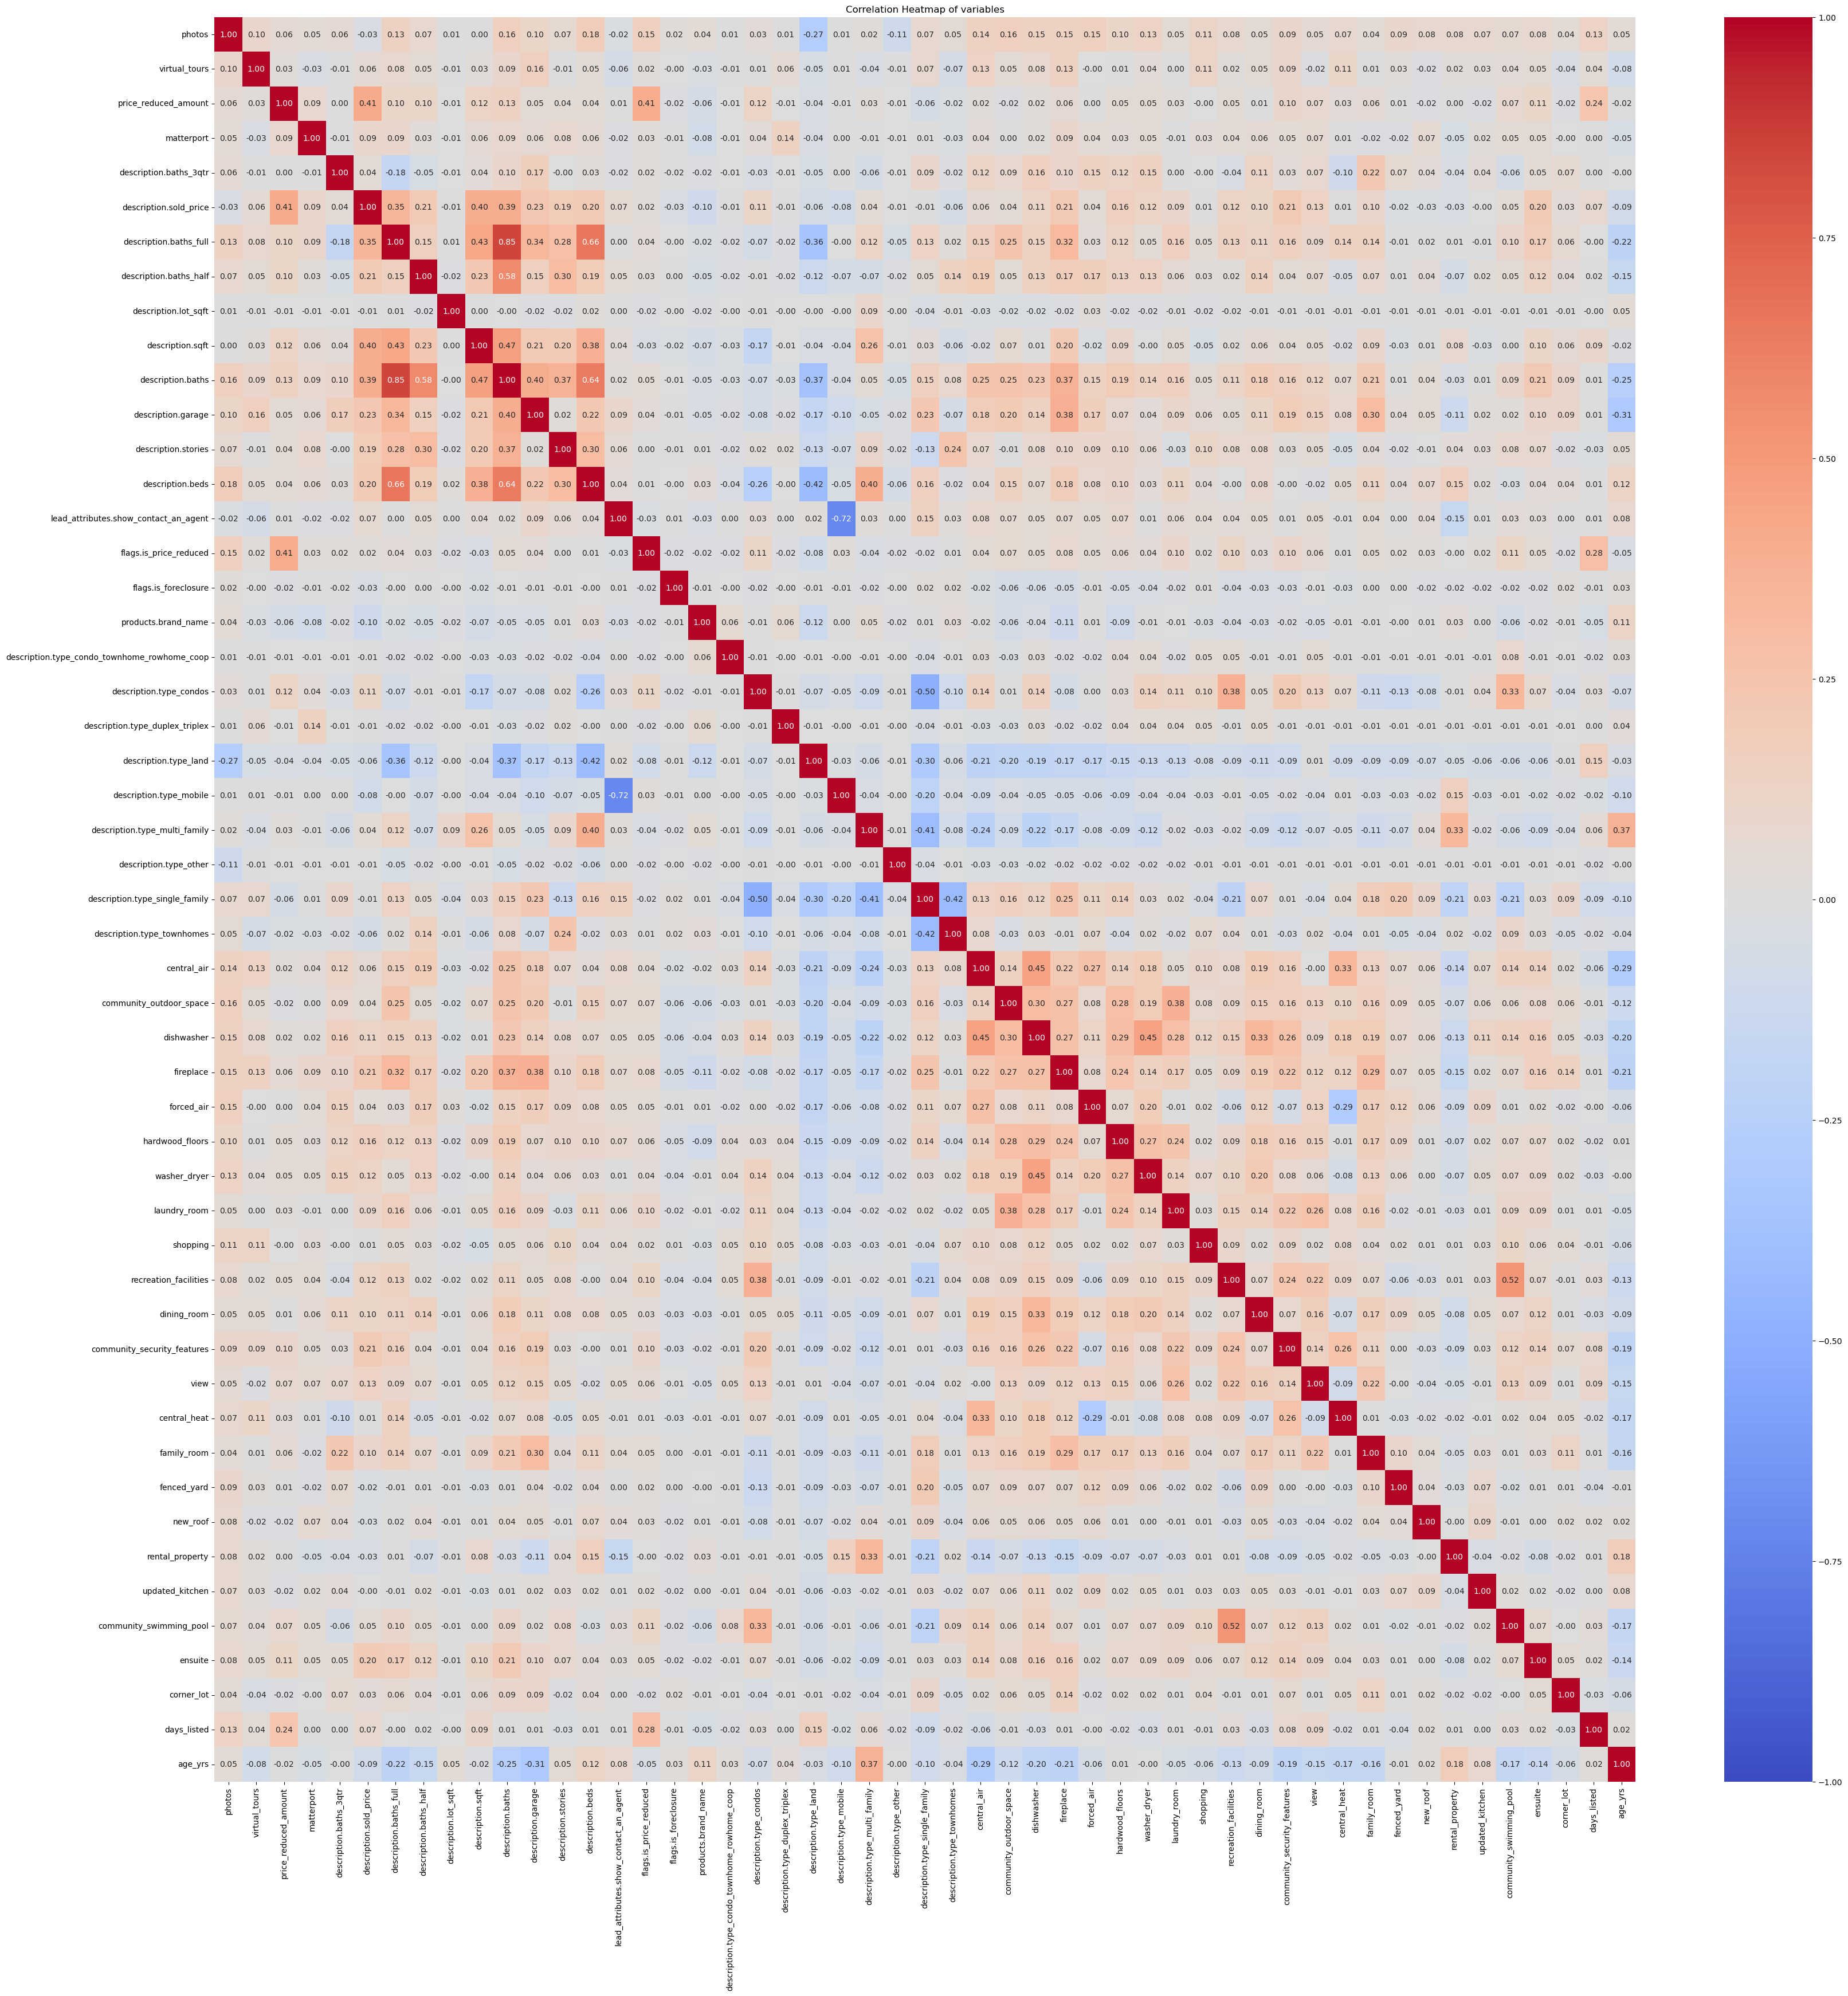

In [625]:
# seaborn correlation heatmap for the variables with the target variable, description.sold_price
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df_no_city_state.corr()

plt.figure(figsize=(40, 40))

# heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# title
plt.title('Correlation Heatmap of variables')

plt.show()



Initial thoughts on heatmap:
- for description.sold_price the largest correlation is price_reduced amount (0.41) then sqft (0.4) closely followed baths (0.39)
- it is strange that baths is the biggest correlation of the baths features - baths_full 0.35, baths_half 0.21 and baths_3qtr was 0.04, so we could remove the other baths_full/half/qtr columns leaving only the baths one which most strongly correlates

- the strongest negative correlation in the entire df by a long way was contact_an_agent and mobile homes, -0.72. Otherwise this column and many others have very very little correlation with anything, let alone sold price.

The next step should be to remove a large number of the columns which do not seem to have any correlation with sold_price. Make a threshold +/- 0.05 to exclude:
- corner_lot, updated_kitchen, rental_property, new_roof, fenced_yard, central_heat, shopping, forced_air, community_outdoor_space, description.type.single_family, type_._multi_family, type_other, type_duplex_triplex, type_condo_townhome, flags.is_foreclosure, flags.is_price.reduced

- we could further feature engineer number of baths & beds as one single feature and some of the tags which have a correlation.

## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized